In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_excel(r"C:\Users\abhishekgh\Desktop\ExcelR\EastWestAirlines.xlsx",sheet_name='data')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [6]:
df.shape

(3999, 12)

In [7]:
df.size

47988

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [10]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [12]:
df[df.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [13]:
df.value_counts('Award?')

Award?
0    2518
1    1481
Name: count, dtype: int64

In [14]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

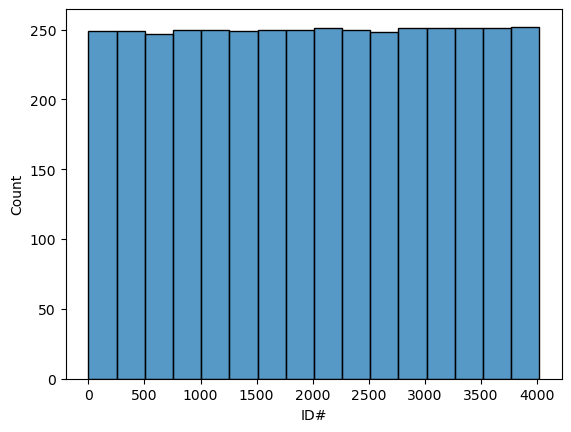

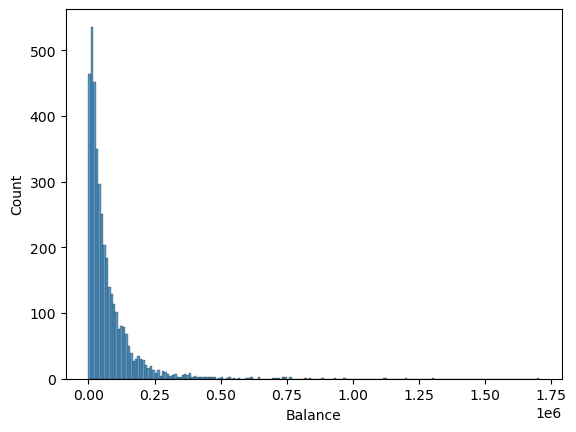

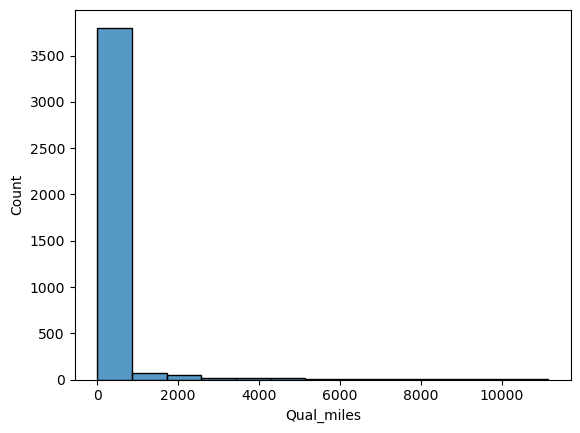

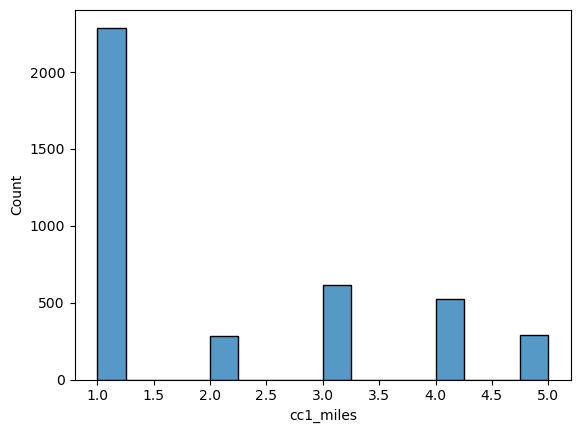

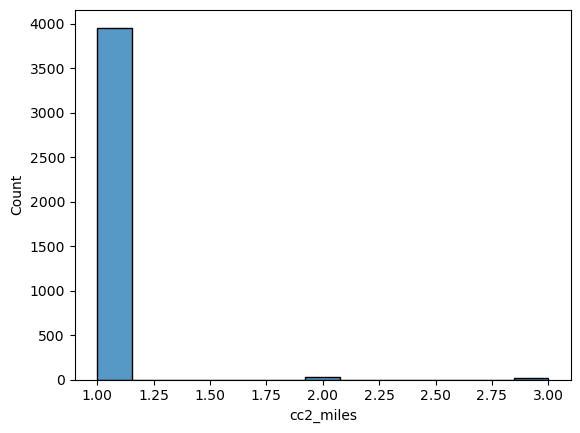

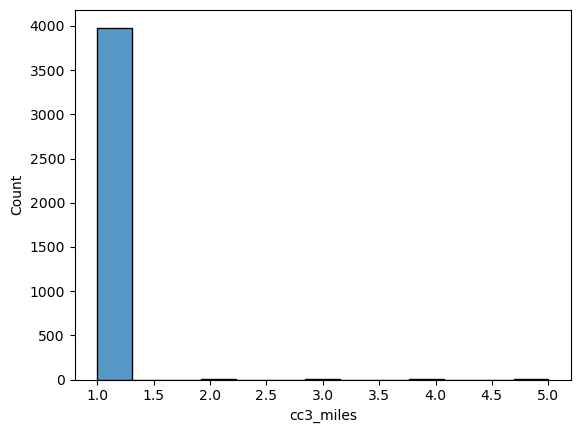

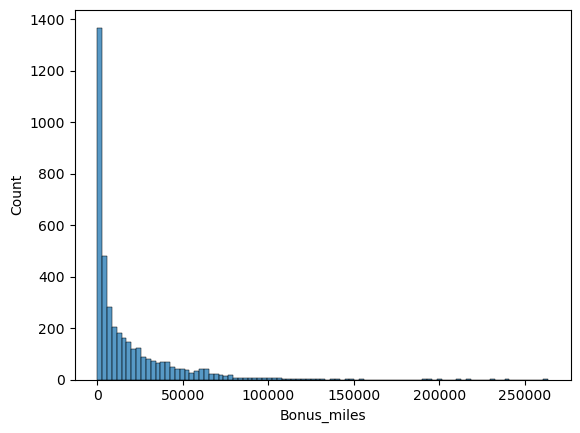

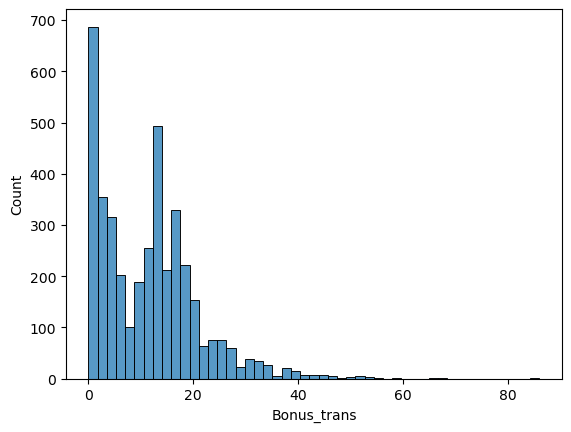

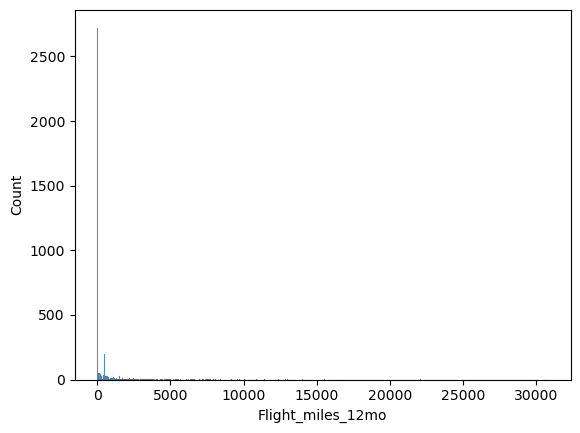

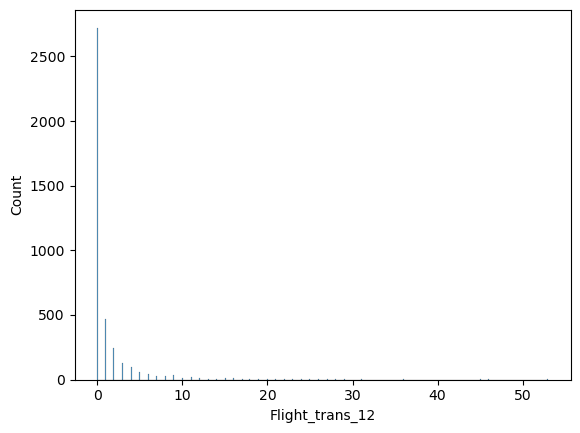

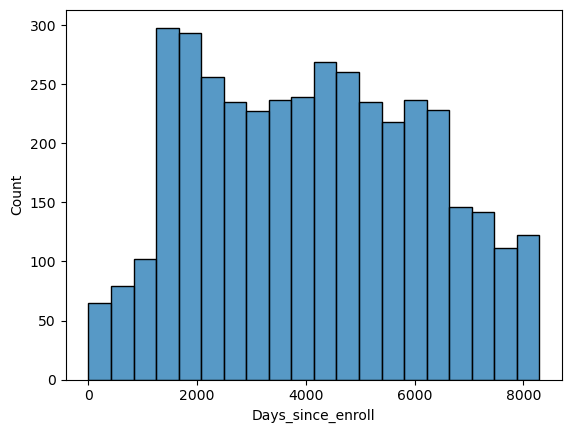

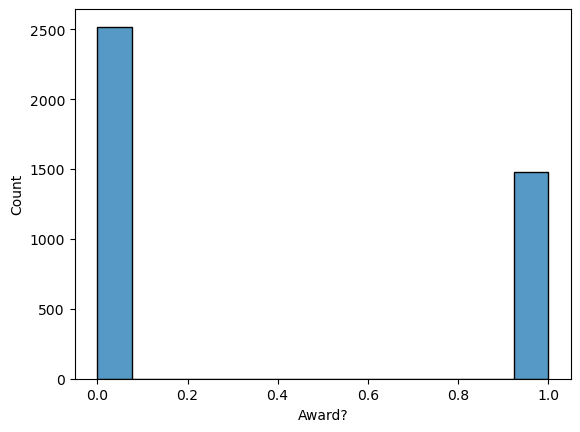

In [15]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df,x=i)
    plt.show()

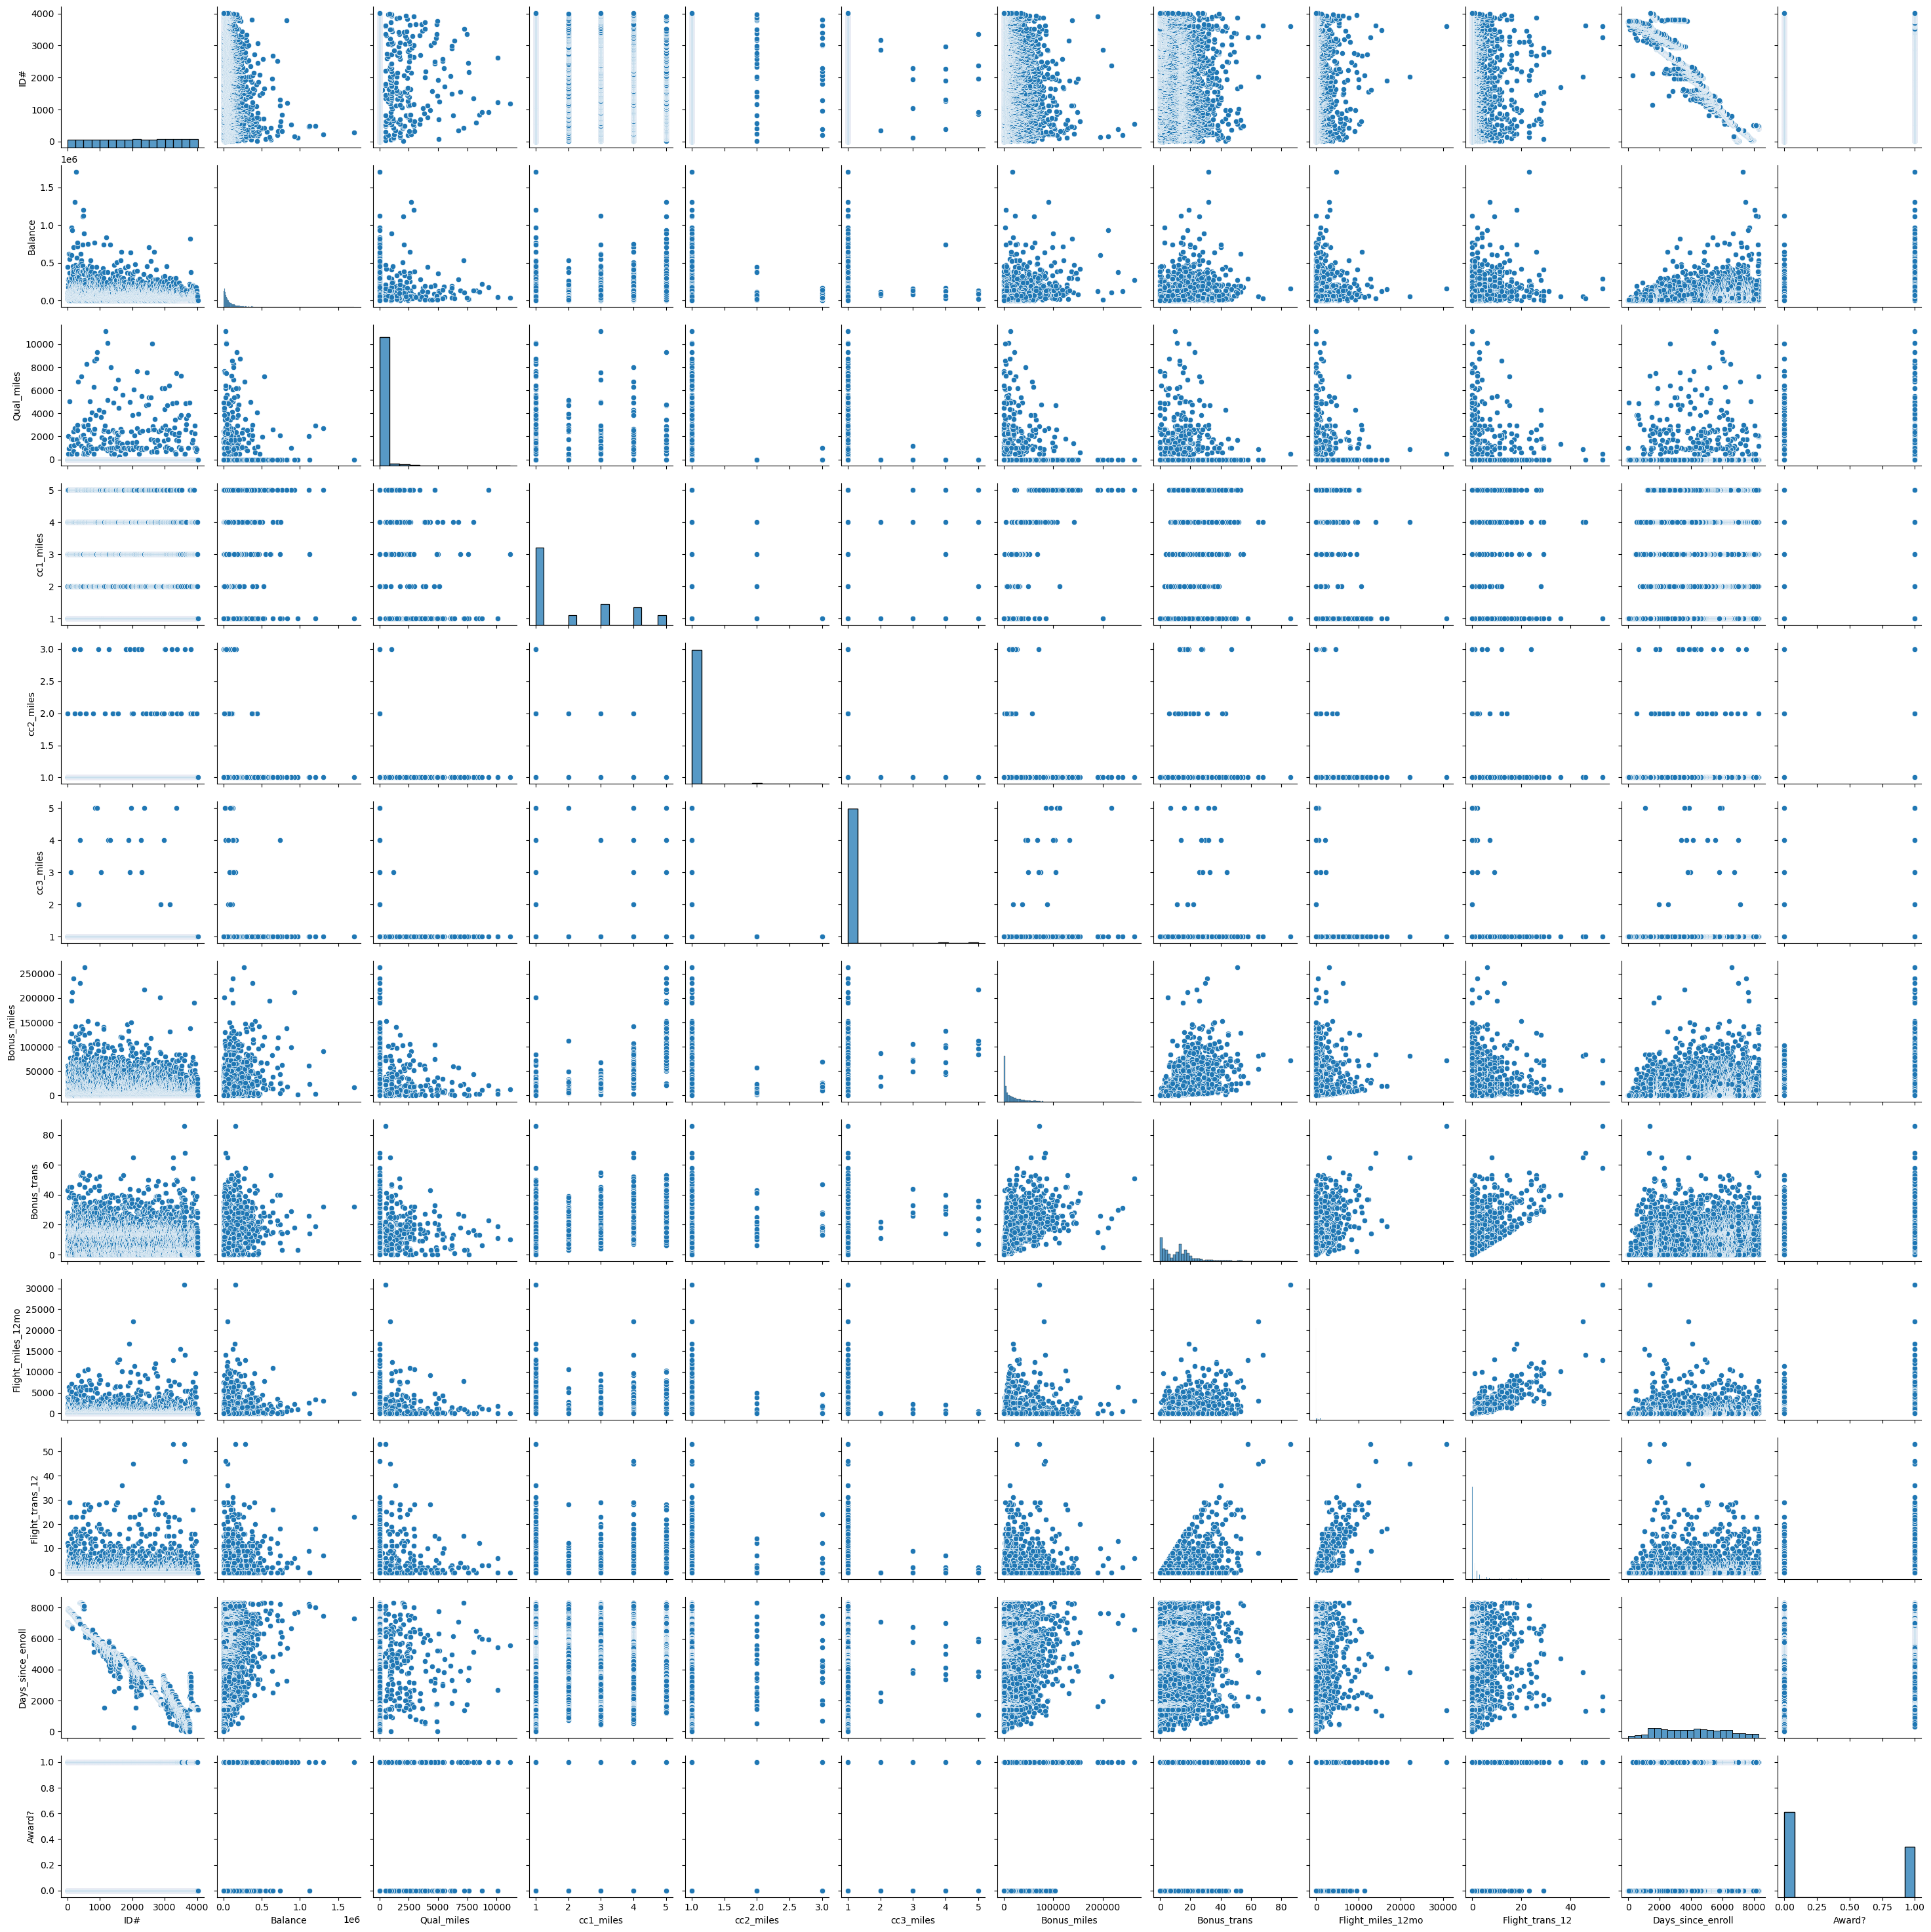

In [16]:
sns.pairplot(df)
plt.show()

In [43]:
features=df.drop(columns=['ID#','Award?'])

In [45]:
features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


## K-Means Clustering

In [142]:
kmeans=KMeans(n_clusters=2)

In [144]:
clusters=kmeans.fit(features)

In [146]:
clusters

KMeans(n_clusters=2)

In [148]:
np.unique(clusters.labels_)

array([0, 1])

In [150]:
df['clusters']=clusters.labels_

In [152]:
df[df.clusters==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [154]:
df[df.clusters==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
24,25,205651,500,1,1,1,4025,21,700,4,7932,0,1
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,1
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,1
45,46,288865,967,1,1,1,23600,14,2000,4,6884,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3756,3779,203353,0,1,1,1,14000,13,4000,8,3557,1,1
3772,3795,822321,0,5,1,1,138334,26,600,2,3288,1,1
3788,3811,374613,0,1,2,1,23592,31,5000,14,3463,1,1
3839,3862,204693,0,1,1,1,5159,5,0,0,1672,0,1


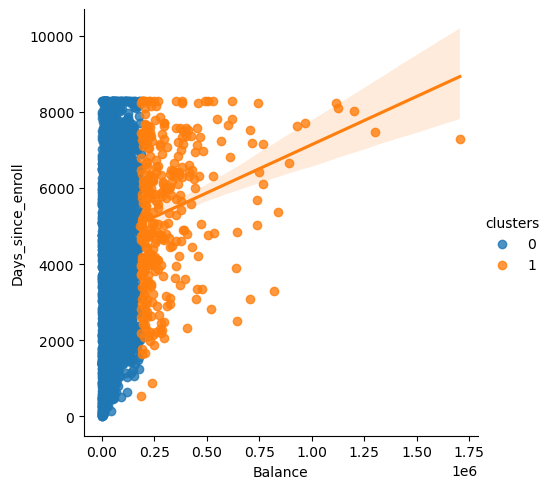

In [158]:
sns.lmplot(data=df,x='Balance',y='Days_since_enroll',hue='clusters')

In [159]:
cluster=range(1,15)
cluster

range(1, 15)

In [160]:
inertia=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

In [161]:
inertia

[42961820045654.55,
 20840064180227.207,
 11850310223850.363,
 7549750701113.964,
 6172810910422.595,
 4800766527751.628,
 3697877560129.5947,
 3271869895984.926,
 2902359090326.1504,
 2649734068820.1157,
 2455174559787.3184,
 2208841989627.914,
 2084109222543.479,
 1868204885575.4763]

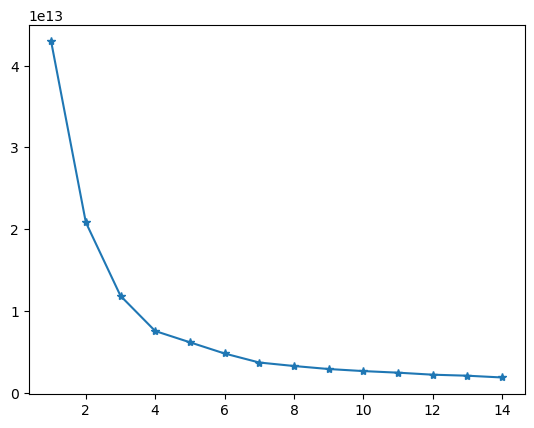

In [162]:
plt.plot(cluster,inertia,marker='*')

In [165]:
silhouette_score(features,clusters.labels_)

0.7418962153965261

## Hierarchial Clustering

In [179]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

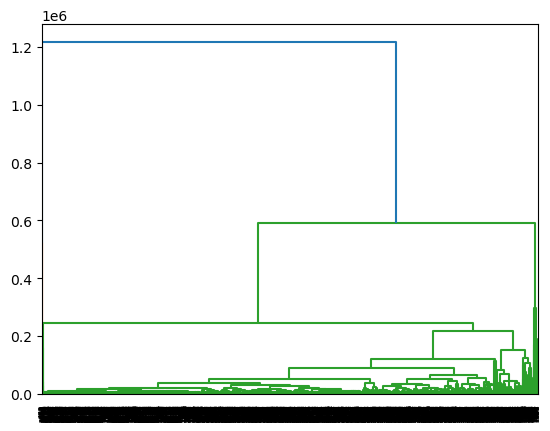

In [181]:
dendrogram=sch.dendrogram(sch.linkage(features,method='average'))

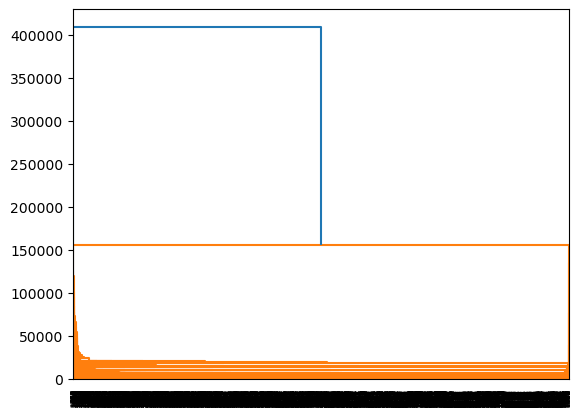

In [189]:
dendrogram=sch.dendrogram(sch.linkage(features,method='single'))

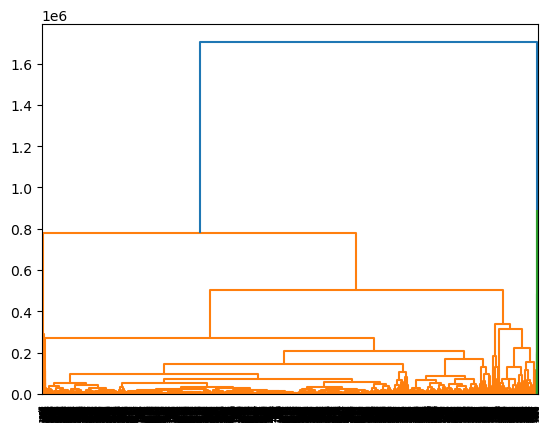

In [192]:
dendrogram=sch.dendrogram(sch.linkage(features,method='complete'))

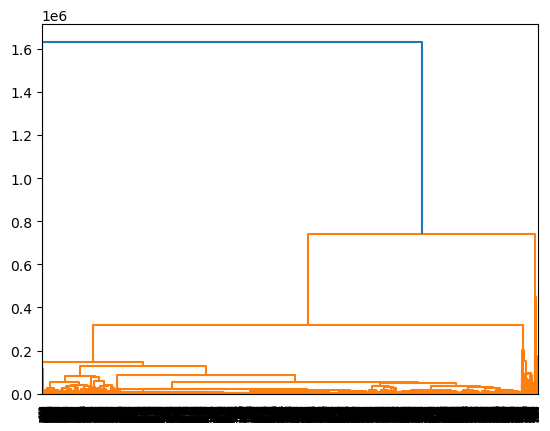

In [193]:
dendrogram=sch.dendrogram(sch.linkage(features,method='centroid'))

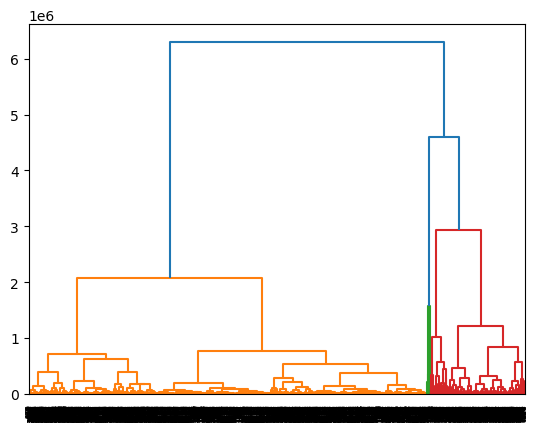

In [195]:
denfrogram=sch.dendrogram(sch.linkage(features,method='ward'))

In [237]:
agglomerative_cluster=AgglomerativeClustering(n_clusters=2,linkage='ward')

In [239]:
clusters=agglomerative_cluster.fit(features)

In [240]:
clusters

AgglomerativeClustering()

In [241]:
clusters.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [245]:
silhouette_score(features,clusters.labels_)

0.6507953123558622

## DBSCAN Clustering

In [257]:
from sklearn.cluster import DBSCAN

In [271]:
from sklearn.preprocessing import StandardScaler

In [273]:
sta_scaler=StandardScaler()

In [275]:
sta_scaler.fit_transform(features)

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

In [277]:
features.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll'],
      dtype='object')

In [281]:
features1=pd.DataFrame(sta_scaler.fit_transform(features),columns=features.columns)
features1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975
...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088


In [295]:
eps=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
min_node=range(1,15)

In [317]:
output=[]
for i in eps:
    for j in min_node:
        labels=DBSCAN(eps=i,min_samples=j).fit(features).labels_
        output.append([i,j])

In [303]:
output

[[0.1, 1],
 [0.1, 2],
 [0.1, 3],
 [0.1, 4],
 [0.1, 5],
 [0.1, 6],
 [0.1, 7],
 [0.1, 8],
 [0.1, 9],
 [0.1, 10],
 [0.1, 11],
 [0.1, 12],
 [0.1, 13],
 [0.1, 14],
 [0.2, 1],
 [0.2, 2],
 [0.2, 3],
 [0.2, 4],
 [0.2, 5],
 [0.2, 6],
 [0.2, 7],
 [0.2, 8],
 [0.2, 9],
 [0.2, 10],
 [0.2, 11],
 [0.2, 12],
 [0.2, 13],
 [0.2, 14],
 [0.3, 1],
 [0.3, 2],
 [0.3, 3],
 [0.3, 4],
 [0.3, 5],
 [0.3, 6],
 [0.3, 7],
 [0.3, 8],
 [0.3, 9],
 [0.3, 10],
 [0.3, 11],
 [0.3, 12],
 [0.3, 13],
 [0.3, 14],
 [0.4, 1],
 [0.4, 2],
 [0.4, 3],
 [0.4, 4],
 [0.4, 5],
 [0.4, 6],
 [0.4, 7],
 [0.4, 8],
 [0.4, 9],
 [0.4, 10],
 [0.4, 11],
 [0.4, 12],
 [0.4, 13],
 [0.4, 14],
 [0.5, 1],
 [0.5, 2],
 [0.5, 3],
 [0.5, 4],
 [0.5, 5],
 [0.5, 6],
 [0.5, 7],
 [0.5, 8],
 [0.5, 9],
 [0.5, 10],
 [0.5, 11],
 [0.5, 12],
 [0.5, 13],
 [0.5, 14],
 [0.6, 1],
 [0.6, 2],
 [0.6, 3],
 [0.6, 4],
 [0.6, 5],
 [0.6, 6],
 [0.6, 7],
 [0.6, 8],
 [0.6, 9],
 [0.6, 10],
 [0.6, 11],
 [0.6, 12],
 [0.6, 13],
 [0.6, 14],
 [0.7, 1],
 [0.7, 2],
 [0.7, 3],
 [0.7, 4],
 [

In [305]:
a=pd.DataFrame(output)
a

,0,1
0,0.1,1
1,0.1,2
2,0.1,3
3,0.1,4
4,0.1,5
...,...,...
93,0.7,10
94,0.7,11
95,0.7,12
96,0.7,13


In [326]:
labels=DBSCAN(eps=0.7,min_samples=11).fit(features1).labels_

In [332]:
labels

array([0, 0, 0, ..., 3, 0, 0], dtype=int64)

In [342]:
labels1=DBSCAN(eps=0.5,min_samples=6).fit(features1).labels_
labels1

array([ 0,  0,  0, ..., -1,  0,  0], dtype=int64)

<Axes: xlabel='Balance', ylabel='Days_since_enroll'>

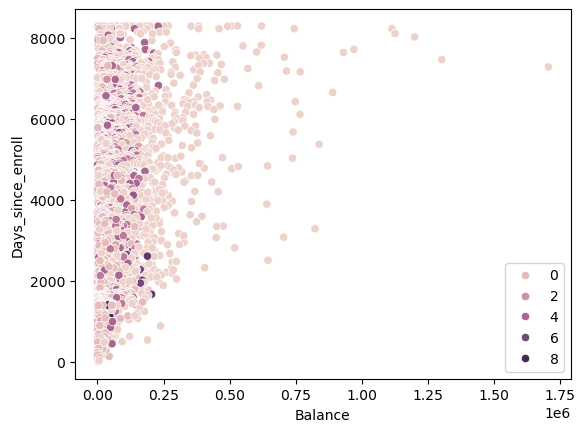

In [344]:
sns.scatterplot(data=features,x='Balance',y='Days_since_enroll',hue=labels1)